<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/2_Advanced/06_Exercise_Job_Demand.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Exercise - Analyzing Data Science Job Demand

## Topics Covered

This exercise goes over:

* Data cleaning and preparation 
* Data management
* Extract from datetime
* Pivot tables
* Index management

## Question

In our project we want to see how in-demand skills are trending for data jobs. But before we do that let's look at:
* General trend of data jobs in demand. We're going to look at it by month.

Load data.

In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## Demand of Data Jobs

1. First step is we're only going to look at roles in the United States. So we're going to create a copy of our DataFrame and only include roles that are in the United States.

In [3]:
## Skill count per month for data analysts
df_AUS = df[df['job_country'] == 'Australia'].copy()

2. Since we're getting the count by month we need to aggregate by month. We can do this by first extracting the month from our `job_posted_date` column.

In [4]:
# extract the month name from 'job_posted_date'
df_AUS['job_posted_month'] = df_AUS['job_posted_date'].dt.strftime('%B')

3. Next let's pivot by month and `job_title_short` and get the count. 

In [5]:
df_AUS_pivot = df_AUS.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [6]:
df_AUS_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,68,52,94,351,64,35,11,121,18,163
August,102,72,172,461,102,38,49,162,37,212
December,34,31,83,182,73,26,11,62,14,92
February,51,22,85,361,73,25,21,92,16,76
January,144,28,213,760,152,31,56,230,35,97
July,61,49,135,373,108,36,15,134,27,128
June,34,20,92,311,81,14,15,97,14,52
March,59,53,93,372,64,31,23,119,22,189
May,45,19,56,281,49,17,13,89,21,88


4. Let's sort this.

NOTE: See bottom of this notebook for easier way to do this.

In [9]:
# sort job_posted_month_name in df_AUS_pivot by job_posted_month value
df_AUS_pivot = df_AUS_pivot.reset_index()
df_AUS_pivot['job_posted_month_no'] = pd.to_datetime(df_AUS_pivot['job_posted_month'], format='%B').dt.month
df_AUS_pivot = df_AUS_pivot.sort_values('job_posted_month_no')
df_AUS_pivot = df_AUS_pivot.set_index('job_posted_month')
df_AUS_pivot = df_AUS_pivot.drop(columns='job_posted_month_no')

df_AUS_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,144,28,213,760,152,31,56,230,35,97
February,51,22,85,361,73,25,21,92,16,76
March,59,53,93,372,64,31,23,119,22,189
April,68,52,94,351,64,35,11,121,18,163
May,45,19,56,281,49,17,13,89,21,88
June,34,20,92,311,81,14,15,97,14,52
July,61,49,135,373,108,36,15,134,27,128
August,102,72,172,461,102,38,49,162,37,212
September,100,33,186,412,123,44,30,123,31,134


5. Let's now graph this.

Now we could plot all of this

<Axes: xlabel='job_posted_month'>

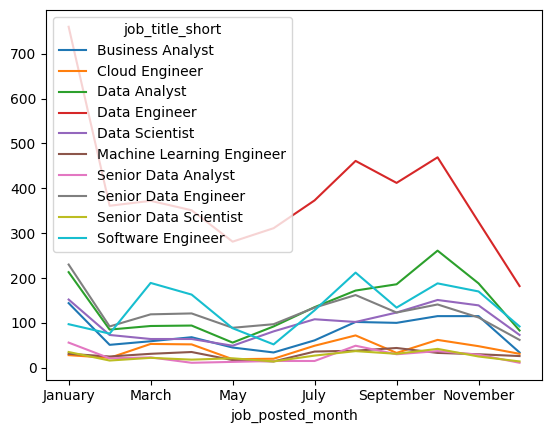

In [10]:
df_AUS_pivot.plot(kind='line')

Instead we'll just focus on the top 3 roles.

In [11]:
top_3 = df_AUS['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()
top_3

['Data Engineer', 'Data Analyst', 'Software Engineer']

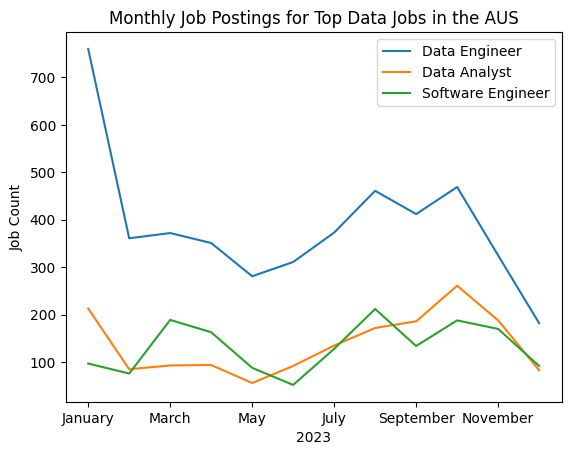

In [12]:
df_AUS_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the AUS')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

## Easier Method to Sort Months

After filming the video portion for this I found there is an easier way to sort the months. using the `.to_period('M')` method. 

In [13]:
# extract the month name from 'job_posted_date'
df_AUS['job_posted_month'] = df_AUS['job_posted_date'].dt.to_period('M')

In [14]:
df_AUS_pivot = df_AUS.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

df_AUS_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
2023-01,144,28,213,760,152,31,56,230,35,97
2023-02,51,22,85,361,73,25,21,92,16,76
2023-03,59,53,93,372,64,31,23,119,22,189
2023-04,68,52,94,351,64,35,11,121,18,163
2023-05,45,19,56,281,49,17,13,89,21,88
2023-06,34,20,92,311,81,14,15,97,14,52
2023-07,61,49,135,373,108,36,15,134,27,128
2023-08,102,72,172,461,102,38,49,162,37,212
2023-09,100,33,186,412,123,44,30,123,31,134


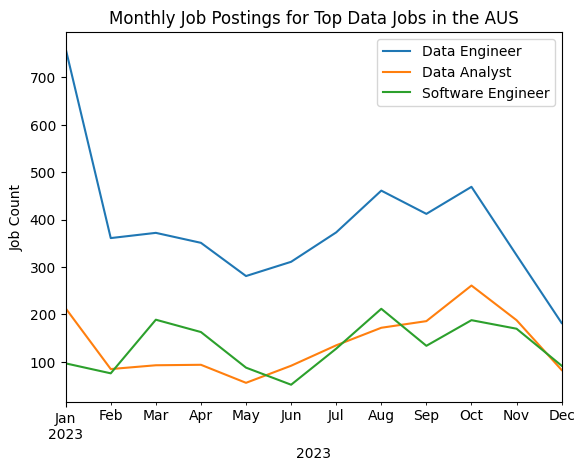

In [15]:
df_AUS_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the AUS')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()